In [0]:
import sys
print(sys.version)

CURR_DIR = '/content/drive/My Drive/google_colab_work/detailed_probabilistic_robotics/'
sys.path.append(CURR_DIR)

3.6.9 (default, Nov  7 2019, 10:44:02) 
[GCC 8.3.0]


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import scipy.stats
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
filename = CURR_DIR + 'sensor_data/sensor_data_200.txt'
data = pd.read_csv(filename, delimiter=' ', header=None, names=('date', 'time', 'ir', 'lidar'))

data

,date,time,ir,lidar
0,20180122,95819,305,214
1,20180122,95822,299,211
2,20180122,95826,292,199
3,20180122,95829,321,208
4,20180122,95832,298,212
...,...,...,...,...
58983,20180124,120023,313,208
58984,20180124,120026,297,200
58985,20180124,120030,323,204
58986,20180124,120033,326,207


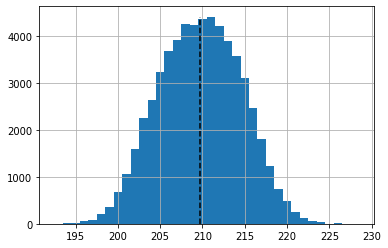

In [0]:
mean = data['lidar'].mean()
data['lidar'].hist(bins=max(data['lidar'])-min(data['lidar']), align='left')
plt.vlines(mean, ymin=0, ymax=max(data['lidar'].value_counts()), linestyles='dashed')
plt.show()

In [0]:
print(type(data['lidar']))
print(type(data['lidar'].values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [0]:
zs = data['lidar'].values ### pandas.core.series.Series ---> numpy.ndarray
mean = sum(zs) / len(zs)
diff_square = [(z - mean)**2 for z in zs]

sampling_var = sum(diff_square) / len(zs)
unbiased_var = sum(diff_square) / (len(zs) - 1)
print('sampling_var =', sampling_var)
print('unbiased_var =', unbiased_var)
print()

pd_sampling_var = data['lidar'].var(ddof=0)
pd_unbiased_var = data['lidar'].var()
print('pd_sampling_var =', pd_sampling_var)
print('pd_unbiased_var =', pd_unbiased_var, '(default)')
print()

np_sampling_var = np.var(data['lidar'])
np_unbiased_var = np.var(data['lidar'], ddof=1) 
print('pd_sampling_var =', pd_sampling_var, '(default)')
print('pd_unbiased_var =', pd_unbiased_var)
print()

sampling_var = 23.407709770274106
unbiased_var = 23.40810659855441

pd_sampling_var = 23.407709770274106
pd_unbiased_var = 23.40810659855441 (default)

pd_sampling_var = 23.407709770274106 (default)
pd_unbiased_var = 23.40810659855441



In [0]:
print(type(data['lidar'].value_counts()))
print(type(pd.DataFrame(data['lidar'].value_counts())))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [0]:
freqs = pd.DataFrame(data['lidar'].value_counts()) ### pandas.core.series.Series ---> pandas.core.frame.DataFrame
freqs['probs'] = freqs['lidar'] / len(data['lidar'])

freqs.transpose()

,211,210,208,209,212,207,213,206,214,205,215,204,216,203,217,202,218,201,219,200,220,199,221,198,222,197,196,223,224,226,195,194,193,227,229
lidar,4409.000000,4355.000000,4261.000000,4228.000000,4201.000000,3920.000000,3897.000000,3674.000000,3572.000000,3225.000000,3108.000000,2638.000000,2459.000000,2252.000000,1812.000000,1584.000000,1224.00000,1053.000000,749.000000,668.000000,486.000000,353.000000,252.000000,205.000000,127.000000,84.000000,59.000,55.000000,32.000000,15.000000,13.00000,10.00000,4.000000,3.000000,1.000000
probs,0.074744,0.073829,0.072235,0.071676,0.071218,0.066454,0.066064,0.062284,0.060555,0.054672,0.052689,0.044721,0.041686,0.038177,0.030718,0.026853,0.02075,0.017851,0.012697,0.011324,0.008239,0.005984,0.004272,0.003475,0.002153,0.001424,0.001,0.000932,0.000542,0.000254,0.00022,0.00017,0.000068,0.000051,0.000017


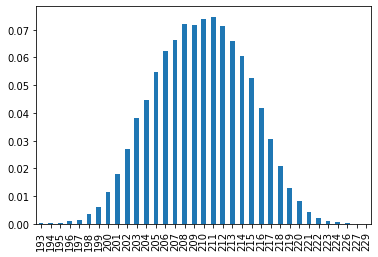

In [0]:
freqs['probs'].sort_index().plot.bar()
plt.show()

In [0]:
freqs.sample(n=1, weights='probs').index[0]

210

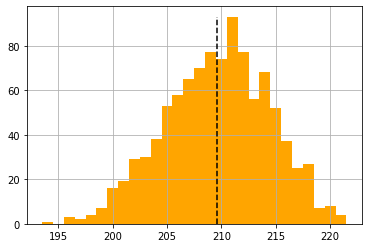

In [0]:
sample_size = 1000
samples = [freqs.sample(n=1, weights='probs').index[0] for i in range(sample_size)]
simulated = pd.DataFrame(samples, columns=['lidar'])

mean = simulated['lidar'].mean()
simulated['lidar'].hist(bins=max(simulated['lidar'])-min(simulated['lidar']), align='left', color='orange')
plt.vlines(mean, ymin=0, ymax=max(simulated['lidar'].value_counts()), linestyles='dashed')
plt.show()

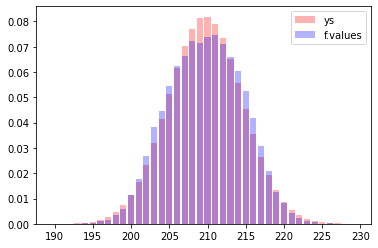

In [0]:
def norm_dist(z, mu=209.7, sigma=23.4):
    return math.exp(-(z - mu)**2 / (2*sigma)) / math.sqrt(2*math.pi*sigma)


def norm_pmf(z, half_width=0.5):
    width = 2 * half_width
    height = (norm_dist(z - half_width) + norm_dist(z + half_width)) / 2
    return  width*height


zs = range(190, 230)
ys = [norm_pmf(z) for z in zs]
f = freqs['probs'].sort_index()

plt.bar(zs, ys, color='red', alpha=0.3, label='ys')
plt.bar(f.index, f.values, color='blue', alpha=0.3, label='f.values')
plt.legend()
plt.show()

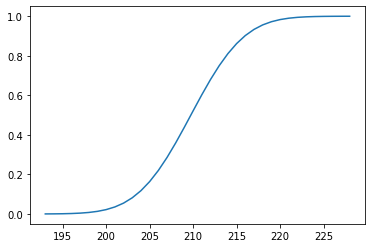

In [0]:
mean = data['lidar'].mean()
stddev = data['lidar'].std()

zs = range(min(data['lidar']), max(data['lidar']))
ys = [scipy.stats.norm.cdf(z, mean, stddev) for z in zs]

plt.plot(zs, ys)
plt.show()

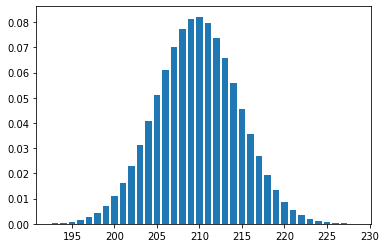

In [0]:
zs = range(min(data['lidar']), max(data['lidar']))
ys = [
    scipy.stats.norm.cdf(z+0.5, mean, stddev) - scipy.stats.norm.cdf(z-0.5, mean, stddev)
    for z in zs
]

plt.bar(zs, ys)
plt.show()

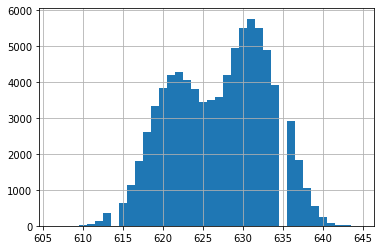

In [0]:
filename = CURR_DIR + '/sensor_data/sensor_data_600.txt'
data = pd.read_csv(filename, delimiter=' ', header=None, names=('date', 'time', 'ir', 'lidar'))

data['lidar'].hist(bins=max(data['lidar'])-min(data['lidar']), align='left')
plt.show()

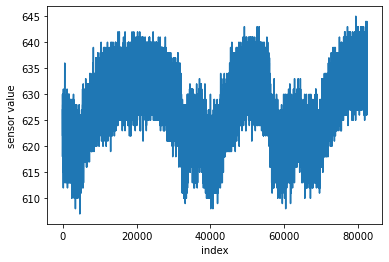

In [0]:
data['lidar'].plot()
plt.xlabel('index')
plt.ylabel('sensor value')
plt.show()

In [0]:
data['hour'] = [e//10000 for e in data['time']]
d = data.groupby('hour')

d['lidar'].mean()

hour
0     628.591243
1     629.877973
2     630.800510
3     631.773783
4     632.621324
5     633.191700
6     633.366535
7     633.055948
8     632.344947
9     631.411790
10    628.666808
11    624.114181
12    623.272036
13    622.310082
14    620.528419
15    620.649760
16    623.476298
17    623.387433
18    623.952018
19    623.653694
20    623.353885
21    623.485722
22    625.019475
23    627.116036
Name: lidar, dtype: float64

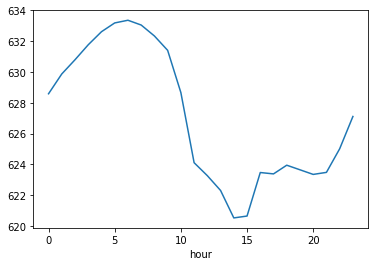

In [0]:
d['lidar'].mean().plot()
plt.show()

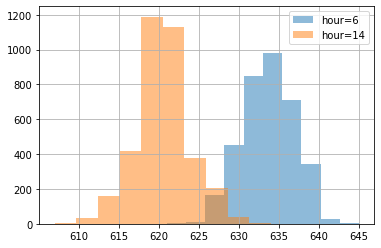

In [0]:
d['lidar'].get_group(6).hist(alpha=0.5, label='hour=6')
d['lidar'].get_group(14).hist(alpha=0.5, label='hour=14')
plt.legend()
plt.show()

In [0]:
each_hour = {
    i: d['lidar'].get_group(i).value_counts().sort_index()
    for i in range(24)
}

each_hour[12]

610      2
611      1
612     10
613     33
615     42
616    101
617    144
618    210
619    265
620    292
621    303
622    298
623    258
624    251
625    207
626    198
627    163
628    195
629    188
630    143
631    119
632     66
633     38
634      8
636     12
637      4
Name: lidar, dtype: int64

In [0]:
freqs = pd.concat(each_hour, axis=1)
freqs = freqs.fillna(0)
probs = freqs / len(data)

print('probs.sum().sum() =', probs.sum().sum())
print()

probs

probs.sum().sum() = 0.9999999999999999



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000000,0.000024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000024,0.000061,0.000036,0.000049,0.000000,0.000000,0.000012,0.000012,0.000134,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000012,0.000097,0.000146,0.000122,0.000000,0.000000,0.000000,0.000024,0.000073,0.000146,0.000049,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000049,0.000122,0.000255,0.000219,0.000316,0.000000,0.000036,0.000036,0.000061,0.000255,0.000194,0.000024,0.000012
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000012,0.000134,0.000401,0.000693,0.000620,0.000644,0.000024,0.000182,0.000061,0.000219,0.000680,0.000437,0.000109,0.000024
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000024,0.000279,0.000510,0.001191,0.001300,0.001045,0.000024,0.000207,0.000267,0.000377,0.000984,0.001021,0.000474,0.000049
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000085,0.000814,0.001227,0.001725,0.001956,0.001810,0.000219,0.000595,0.000595,0.001021,0.001725,0.001397,0.000595,0.000085
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000085,0.001349,0.001750,0.002819,0.003111,0.002928,0.000510,0.001264,0.000923,0.001640,0.002211,0.002296,0.001021,0.000146


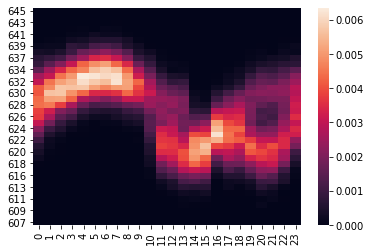

In [0]:
sns.heatmap(probs).invert_yaxis()
plt.show()

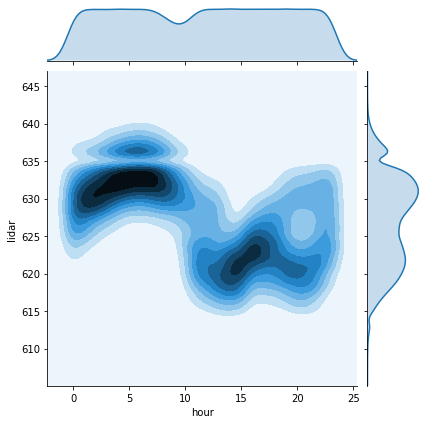

In [0]:
sns.jointplot(data['hour'], data['lidar'], data, kind='kde')
plt.show()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,0.043013,0.042916,0.042879,0.042916,0.042964,0.043037,0.043061,0.043001,0.038712,0.028651,0.028736,0.043098,0.043146,0.043025,0.043183,0.043122,0.043061,0.043122,0.043049,0.043086,0.043159,0.042976,0.043049,0.043037


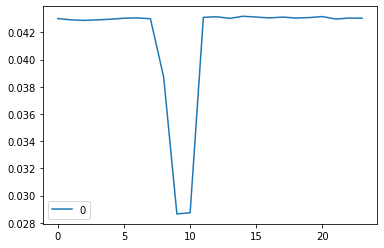

In [0]:
p_t = pd.DataFrame(probs.sum())
p_t.plot()

p_t.transpose()

,607,608,609,610,611,612,613,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,636,637,638,639,640,641,642,643,644,645
0,0.000012,0.000049,0.000061,0.000328,0.00068,0.00158,0.004241,0.007752,0.013852,0.022053,0.031628,0.040498,0.046585,0.050947,0.05198,0.049319,0.046354,0.041725,0.042648,0.043645,0.050996,0.060121,0.066949,0.070048,0.066901,0.059623,0.047776,0.03537,0.02226,0.012819,0.006671,0.002989,0.000996,0.000401,0.000109,0.000024,0.000012


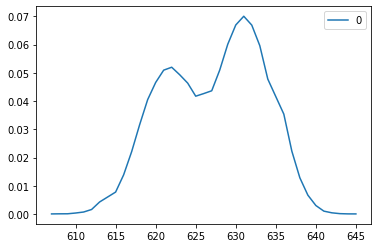

In [0]:
p_z = pd.DataFrame(probs.transpose().sum())
p_z.plot()

p_z.transpose()

In [0]:
### P(z|t) = P(z,t) / P(t)
cond_z_t = probs / p_t[0]

for i in range(24):
    print('cond_z_t[', i, '].sum() =', cond_z_t[i].sum())
print()

cond_z_t

cond_z_t[ 0 ].sum() = 1.0000000000000002
cond_z_t[ 1 ].sum() = 0.9999999999999999
cond_z_t[ 2 ].sum() = 1.0
cond_z_t[ 3 ].sum() = 1.0
cond_z_t[ 4 ].sum() = 0.9999999999999998
cond_z_t[ 5 ].sum() = 0.9999999999999999
cond_z_t[ 6 ].sum() = 1.0
cond_z_t[ 7 ].sum() = 0.9999999999999998
cond_z_t[ 8 ].sum() = 1.0000000000000002
cond_z_t[ 9 ].sum() = 1.0000000000000002
cond_z_t[ 10 ].sum() = 1.0
cond_z_t[ 11 ].sum() = 1.0000000000000002
cond_z_t[ 12 ].sum() = 1.0
cond_z_t[ 13 ].sum() = 1.0
cond_z_t[ 14 ].sum() = 0.9999999999999998
cond_z_t[ 15 ].sum() = 1.0
cond_z_t[ 16 ].sum() = 1.0000000000000004
cond_z_t[ 17 ].sum() = 1.0
cond_z_t[ 18 ].sum() = 0.9999999999999999
cond_z_t[ 19 ].sum() = 0.9999999999999998
cond_z_t[ 20 ].sum() = 0.9999999999999994
cond_z_t[ 21 ].sum() = 1.0
cond_z_t[ 22 ].sum() = 0.9999999999999999
cond_z_t[ 23 ].sum() = 0.9999999999999999



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
607,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000281,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000283,0.000000,0.000000
609,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000000,0.000564,0.000000,0.000000,0.000000,0.000000,0.000000,0.000283,0.000282,0.000000
610,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000563,0.001412,0.000844,0.001127,0.000000,0.000000,0.000282,0.000282,0.003097,0.000000,0.000000,0.000000
611,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000282,0.000282,0.002259,0.003376,0.002818,0.000000,0.000000,0.000000,0.000564,0.001689,0.003393,0.001129,0.000000
612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001128,0.002816,0.005931,0.005065,0.007326,0.000000,0.000845,0.000847,0.001410,0.005912,0.004524,0.000564,0.000282
613,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000423,0.003101,0.009293,0.016097,0.014350,0.014934,0.000564,0.004227,0.001411,0.005076,0.015766,0.010178,0.002540,0.000565
615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000846,0.006484,0.011828,0.027676,0.030107,0.024232,0.000564,0.004790,0.006209,0.008742,0.022804,0.023749,0.011008,0.001129
616,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002960,0.018889,0.028443,0.040102,0.045301,0.041984,0.005079,0.013807,0.013830,0.023689,0.039977,0.032513,0.013830,0.001976
617,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002960,0.031294,0.040552,0.065518,0.072032,0.067906,0.011851,0.029304,0.021451,0.038071,0.051239,0.053435,0.023709,0.003388


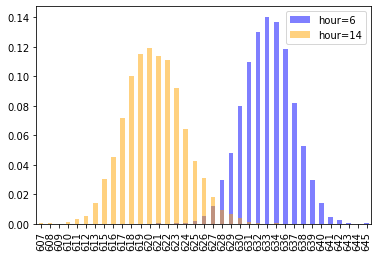

In [0]:
cond_z_t[6].plot.bar(color='blue', alpha=0.5, label='hour=6')
cond_z_t[14].plot.bar(color='orange', alpha=0.5, label='hour=14')
plt.legend()
plt.show()

In [0]:
### P(t|z) = P(z,t) / P(z)
cond_t_z = probs.transpose() / p_z[0]

print('P(t=13 | z=630) =', cond_t_z[630][13])
print('P(t=13) =', p_t[0][13])
print('P(z=630) =', p_z[0][630])
print()

print('Bayse: P(z=630 | t=13) =', cond_t_z[630][13]*p_z[0][630]/p_t[0][13])
print('Answer: P(z=630 | t=13) =', cond_z_t[13][630])

P(t=13 | z=630) = 0.023230490018148822
P(t=13) = 0.043024993620976656
P(z=630) = 0.06694936878045224

Bayse: P(z=630 | t=13) = 0.036147980796385204
Answer: P(z=630 | t=13) = 0.036147980796385204


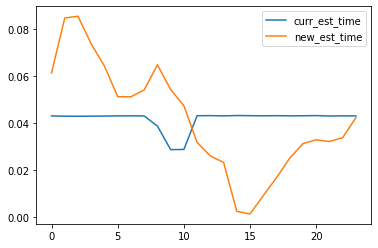

In [0]:
def BayesEstimation(curr_est_time, sensor_data):
    new_est_time = []
    for t in range(24):
        new_est_time.append(cond_z_t[t][sensor_data]*curr_est_time[t])

    return new_est_time / sum(new_est_time)


curr_est_time = p_t[0]
sensor_data = 630
new_est_time = BayesEstimation(curr_est_time, sensor_data)

plt.plot(curr_est_time, label='curr_est_time')
plt.plot(new_est_time, label='new_est_time')
plt.legend()
plt.show()

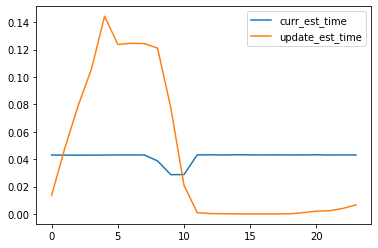

In [0]:
sensor_dataset = [630, 632, 636]

curr_est_time = p_t[0]
update_est_time = curr_est_time.copy()
for sensor_data in sensor_dataset:
    update_est_time = BayesEstimation(update_est_time, sensor_data)

plt.plot(curr_est_time, label='curr_est_time')
plt.plot(update_est_time, label='update_est_time')
plt.legend()
plt.show()

In [0]:
filename = CURR_DIR + 'sensor_data/sensor_data_700.txt'
data = pd.read_csv(filename, delimiter=' ', header=None, names=('date', 'time', 'ir', 'lidar'))
d = data[(120000<=data['time']) & (data['time']<160000)]

d

,date,time,ir,lidar
3832,20180205,120000,17,726
3833,20180205,120003,14,730
3834,20180205,120006,14,724
3835,20180205,120010,21,724
3836,20180205,120013,26,725
...,...,...,...,...
65155,20180207,155946,8,729
65156,20180207,155949,25,730
65157,20180207,155952,10,731
65158,20180207,155955,15,735


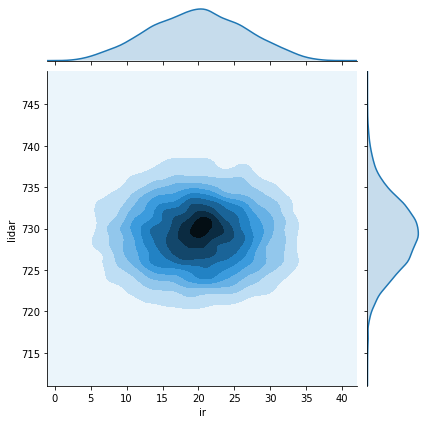

In [0]:
sns.jointplot(d['ir'], d['lidar'], d, kind='kde')
plt.show()

In [0]:
print('var_ir =', d['ir'].var())
print('var_lidar =', d['lidar'].var())

diff_ir = d['ir'] - d['ir'].mean()
diff_lidar = d['lidar'] - d['lidar'].mean()
cov_ir_lidar = sum(diff_ir * diff_lidar) / (len(d) - 1)
print('cov_ir_lidar =', cov_ir_lidar)
print()

d = d.loc[:, ['ir', 'lidar']]
d.mean()

var_ir = 42.117126367699505
var_lidar = 17.702026469211596
cov_ir_lidar = -0.31677803385436953



ir        19.860247
lidar    729.311958
dtype: float64

In [0]:
d.cov()

,ir,lidar
ir,42.117126,-0.316778
lidar,-0.316778,17.702026


In [0]:
print(type(d.mean()))
print(type(d.mean().values))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [0]:
mean = d.mean().values ### pandas.core.series.Series ---> numpy.ndarray
cov = d.cov().values     ### pandas.core.series.Series ---> numpy.ndarray

ir_lidar = scipy.stats.multivariate_normal(mean, cov)

In [0]:
x, y = np.mgrid[0:40, 710:750]

print('x.shape = ', x.shape)
print()

x

x.shape =  (40, 40)



array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [37, 37, 37, ..., 37, 37, 37],
       [38, 38, 38, ..., 38, 38, 38],
       [39, 39, 39, ..., 39, 39, 39]])

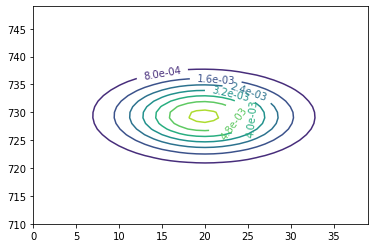

In [0]:
pos = np.empty((x.shape[0], x.shape[1], 2))
pos[:, :, 0] = x
pos[:, :, 1] = y
cont = plt.contour(x, y, ir_lidar.pdf(pos))
cont.clabel(fmt='%1.1e')
plt.show()

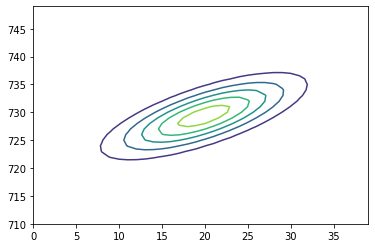

In [0]:
bias_cov = np.array([
    [0, 20],
    [20, 0]
])

mean = d.mean().values
cov = d.cov().values + bias_cov
tmp = scipy.stats.multivariate_normal(mean, cov)
cont = plt.contour(x, y, tmp.pdf(pos))
plt.show()

Text(0, 0.5, 'y')

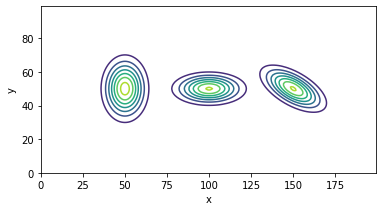

In [0]:
x, y = np.mgrid[0:200, 0:100]
pos = np.empty((x.shape[0], x.shape[1], 2))
pos[:, :, 0] = x
pos[:, :, 1] = y

a = scipy.stats.multivariate_normal(
    mean = [50, 50],
    cov = [
        [50, 0],
        [0, 100]
    ]
)

b = scipy.stats.multivariate_normal(
    mean = [100, 50],
    cov = [
        [125, 0],
        [0, 25]
    ]
)

c = scipy.stats.multivariate_normal(
    mean = [150, 50],
    cov = [
        [100, -25*math.sqrt(3)],
        [-25*math.sqrt(3), 50]
    ]
)

for p in [a, b, c]:
    plt.contour(x, y, p.pdf(pos))

plt.gca().set_aspect('equal')
plt.gca().set_xlabel('x')
plt.gca().set_ylabel('y')

In [0]:
eig_vals, eig_vecs = np.linalg.eig(c.cov)

print('eig_vals =', eig_vals, '\n')
print('eig_vecs =', eig_vecs, '\n')
print('eig_vec 1 =', eig_vecs[:, 0], '\n')
print('eig_vec 2 =', eig_vecs[:, 1], '\n')

eig_vals = [125.  25.] 

eig_vecs = [[ 0.8660254  0.5      ]
 [-0.5        0.8660254]] 

eig_vec 1 = [ 0.8660254 -0.5      ] 

eig_vec 2 = [0.5       0.8660254] 



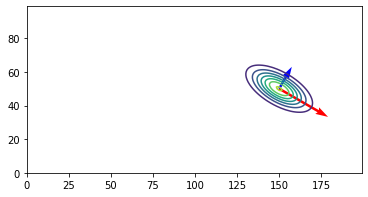

In [0]:
plt.contour(x, y, c.pdf(pos))

v = 3 * math.sqrt(eig_vals[0]) * eig_vecs[:, 0]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color='red', angles='xy', scale_units='xy', scale=1)

v = 3 * math.sqrt(eig_vals[1]) * eig_vecs[:, 1]
plt.quiver(c.mean[0], c.mean[1], v[0], v[1], color='blue', angles='xy', scale_units='xy', scale=1)

plt.gca().set_aspect('equal')
plt.show()